<img src="https://www.climber.eu/wp-content/uploads/sites/2/2020/03/ClimberNL_Blog_DataVisual_Milou_1400x877.jpg">

# Visualization

In this file we will compare the data obtained through APIs to the Strava website, the data obtained through WebScraping to wikipedia and a dataset downloaded from  [Kaggle](https://www.kaggle.com/melvincheung/hong-kong-marathon-2016)

### Import the libraries

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import src.limpieza_texto as lt
import src.visualizacion as vt

### import the datasets

In [113]:
strava = pd.read_csv("data/mis_carreras.csv")

In [114]:
man = pd.read_csv("data/marath_hombres.csv")

In [115]:
woman = pd.read_csv("data/marath_mujeres.csv")

In [116]:
hkm = pd.read_csv("data/challenge.csv")

## API

In [72]:
strava.head(5)

,Unnamed: 0,Nombre carrera,Distancia (km),Tiempo (min),Ritmo medio (min/km),Velocidad media (km/h),Pulso medio (ppm),Altitud (m),Elevacion (m),Fecha,Ciudad,Comunidad Autonoma,Pais,Ubicación
0,0,Lunch Run,8.73,38.07,4.36,13.76,153.0,702.6,76.6,2021-04-10,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
1,1,Morning Run,10.04,46.17,4.60,13.04,148.1,702.6,85.0,2021-04-09,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
2,2,Morning Run,6.85,30.43,4.44,13.51,153.4,690.0,76.6,2021-04-08,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
3,3,Morning Run,5.98,24.83,4.15,14.46,153.9,659.7,66.9,2021-04-07,Madrid,Comunidad de Madrid,España,"[40.42, -3.68]"
4,4,Morning Run,4.82,19.83,4.11,14.60,154.6,683.8,15.6,2021-04-07,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"


In [85]:
strava.describe()

,Unnamed: 0,Distancia (km),Tiempo (min),Ritmo medio (min/km),Velocidad media (km/h),Pulso medio (ppm),Altitud (m),Elevacion (m)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,14.500000,8.516667,37.777000,4.483667,13.421667,144.013333,692.23000,67.396667
std,8.803408,3.368605,14.332539,0.250275,0.754102,11.356442,34.47695,26.903717
min,0.000000,1.070000,5.420000,3.910000,11.830000,114.100000,655.50000,6.700000
25%,7.250000,6.470000,28.945000,4.337500,12.937500,139.775000,666.10000,56.900000
50%,14.500000,8.510000,38.925000,4.460000,13.450000,146.450000,690.30000,75.550000
75%,21.750000,10.210000,45.822500,4.637500,13.835000,152.525000,702.60000,83.275000
max,29.000000,14.110000,62.400000,5.070000,15.350000,160.000000,807.10000,115.000000


<AxesSubplot:xlabel='Distancia (km)', ylabel='Count'>

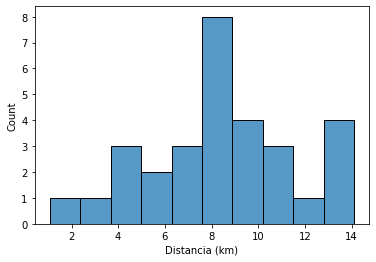

In [60]:
sns.histplot(x = strava['Distancia (km)'], bins = 10)

<AxesSubplot:xlabel='Distancia (km)', ylabel='Tiempo (min)'>

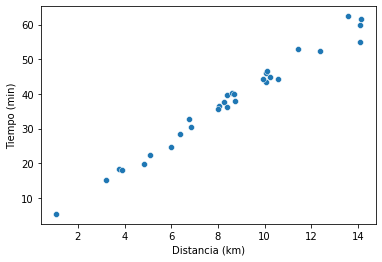

In [61]:
sns.scatterplot(x = strava['Distancia (km)'], y = strava['Tiempo (min)'])

<AxesSubplot:xlabel='Altitud (m)', ylabel='Density'>

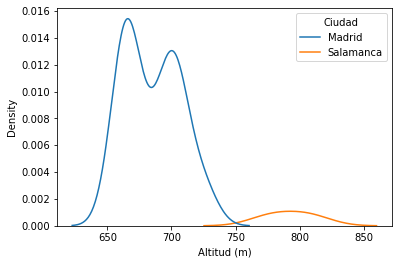

In [69]:
sns.kdeplot(x = strava['Altitud (m)'], hue =strava['Ciudad'])

<AxesSubplot:xlabel='Ritmo medio (min/km)', ylabel='Pulso medio (ppm)'>

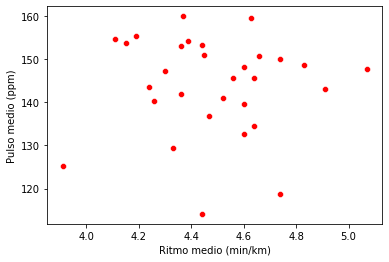

In [64]:
sns.scatterplot(x = strava['Ritmo medio (min/km)'], y = strava['Pulso medio (ppm)'], color='red')

<AxesSubplot:xlabel='Ritmo medio (min/km)', ylabel='Elevacion (m)'>

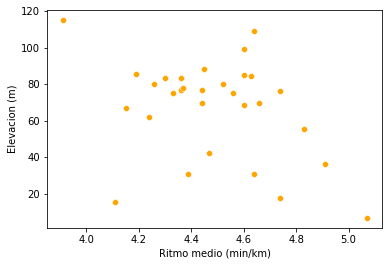

In [89]:
sns.scatterplot(x = strava['Ritmo medio (min/km)'], y = strava['Elevacion (m)'], color='Orange')

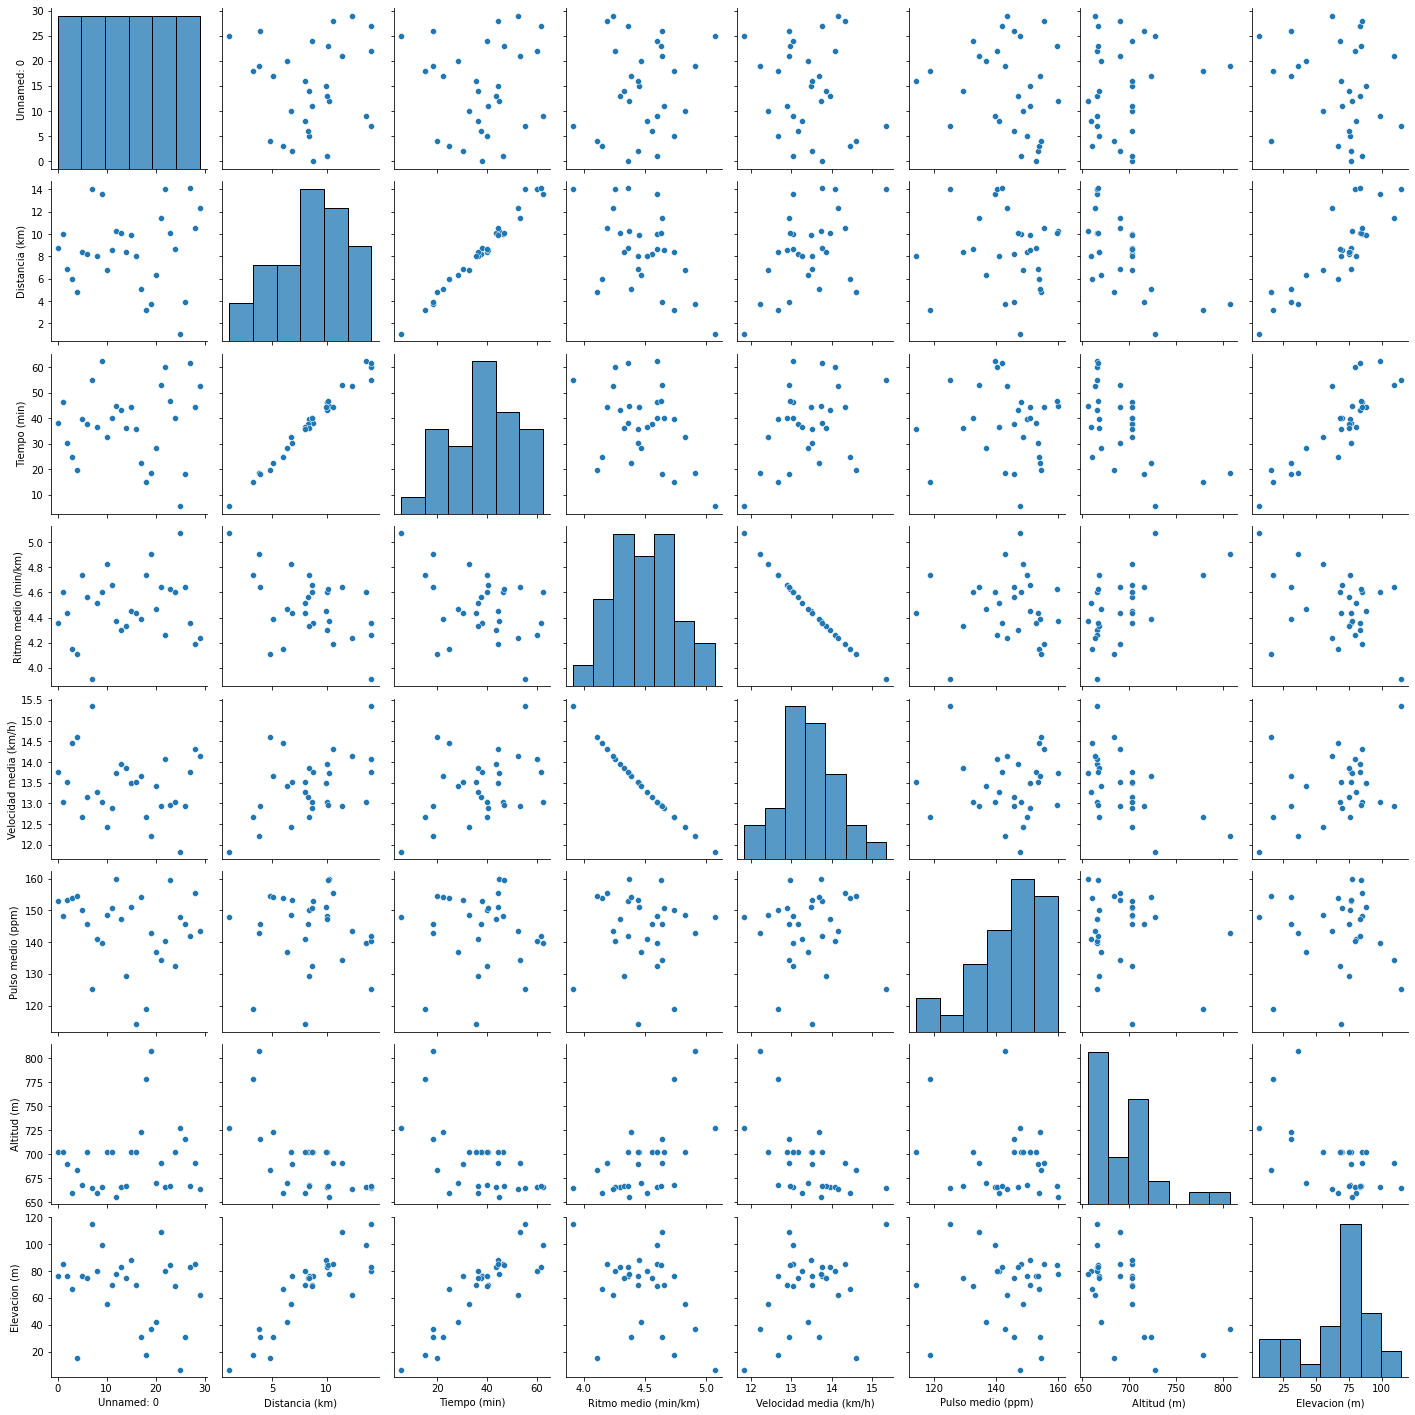

In [65]:
sns.pairplot(data = strava)

# Scrap

In [117]:
man.head(5)

,Posicion,Tiempo,Nombre,Pais,Fecha,Lugar,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,1,2:01:39,Eliud Kipchoge,Kenia,16 de septiembre de 2018,Berlín,121.65,2.88,20.83
1,2,2:01:41,Kenenisa Bekele,Etiopía,29 de septiembre de 2019,Berlín,121.68,2.88,20.83
2,3,2:02:48,Birhanu Legese,Etiopía,29 de septiembre de 2019,Berlín,122.80,2.91,20.62
3,4,2:02:55,Mosinet Geremew,Etiopía,28 de abril de 2019,Londres,122.92,2.91,20.62
4,5,2:02:57,Dennis Kimetto,Kenia,28 de septiembre de 2014,Berlín,122.95,2.91,20.62


<AxesSubplot:xlabel='Lugar', ylabel='Count'>

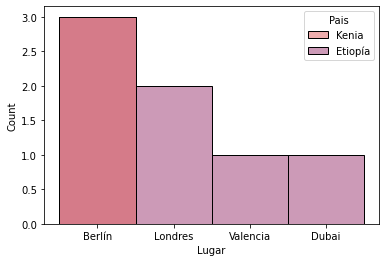

In [118]:
sns.histplot(x = man['Lugar'],hue=man['Pais'], palette="flare")

In [119]:
woman.head(5)

,Posicion,Tiempo,Nombre,Pais,Fecha,Lugar,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,1,2:14:04,Brigid Kosgei,Kenia,13 de octubre de 2019,Chicago,134.07,3.18,18.87
1,2,2:15:25,Paula Radcliffe,Reino Unido,13 de abril de 2003,Londres,135.42,3.21,18.69
2,3,2:17:01,Mary Jepkosgei Keitany,Kenia,23 de abril de 2017,Londres,137.02,3.25,18.46
3,4,2:17:08,Ruth Chepngetich,Kenia,25 de enero de 2019,Dubai,137.13,3.25,18.46
4,5,2:17:41,Worknesh Degefa,Etiopía,25 de enero de 2019,Dubai,137.68,3.26,18.40


<AxesSubplot:xlabel='Lugar', ylabel='Count'>

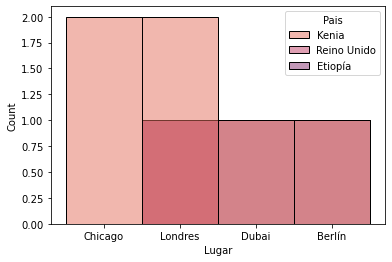

In [120]:
sns.histplot(x = woman['Lugar'],hue=woman['Pais'], palette="flare")

# Kaggle

In [126]:
hkm['Official Time'][3]


'2:12:29'

In [128]:
hkm['Tiempo (min)'] = hkm['Official Time'].apply(vt.cambio_minutos)


In [130]:
hkm['Ritmo (min/km)'] = round(hkm['Tiempo (min)']/42.2, 2)

In [131]:
hkm['Velocidad media (km/h)'] = round(60/hkm['Ritmo (min/km)'],2)
hkm.head(3)

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36,132.20,3.13,19.17
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36,132.23,3.13,19.17
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36,132.33,3.14,19.11


In [132]:
hkm1 = hkm.head(50)
hkm2 = hkm.head(900)
hkm2 = hkm.tail(100)

In [108]:
hkm1.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36


<AxesSubplot:xlabel='Count', ylabel='Country '>

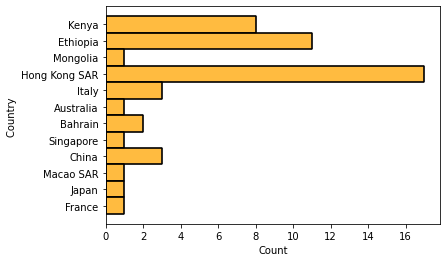

In [110]:
sns.histplot(y = hkm1['Country '], color="orange")